In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import join


In [2]:
figroot = r"E:\OneDrive - Harvard University\BigGAN_Hessian"
syndir = join(figroot, "synopsis")
tuning_stats_synopsis_df = pd.read_pickle(join(syndir, f"ABCD_tuning_stats_synopsis.pkl"))

In [11]:
common_axis_mask = tuning_stats_synopsis_df.lin_dist_set.map(lambda x: max(x) == 0.4)

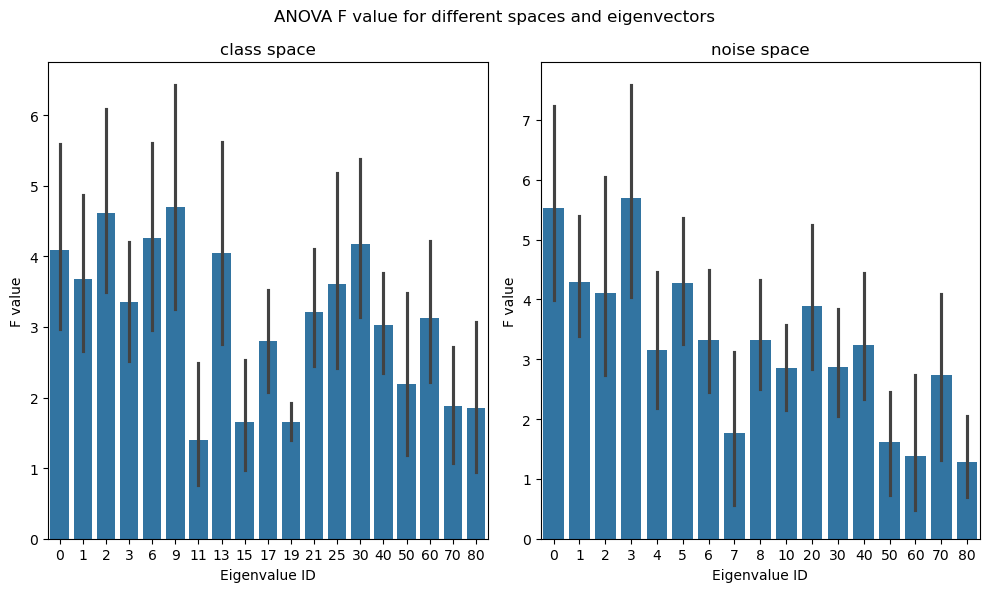

In [12]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0])
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('F value')

sns.barplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1])
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('F value')
fig.suptitle('ANOVA F value for different spaces and eigenvectors')
plt.tight_layout()
plt.show()

In [18]:
len(tuning_stats_synopsis_df[["Animal", "Expi"]].drop_duplicates())

52

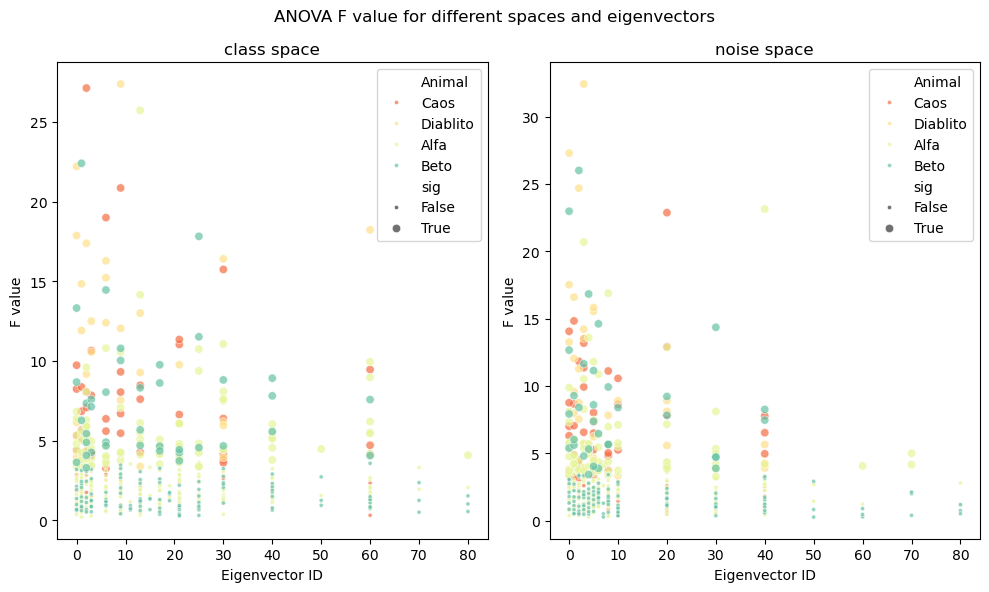

In [15]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors')
plt.tight_layout()
plt.show()



In [9]:
common_axis_mask = tuning_stats_synopsis_df.lin_dist_set.map(lambda x: max(x) == 0.4)

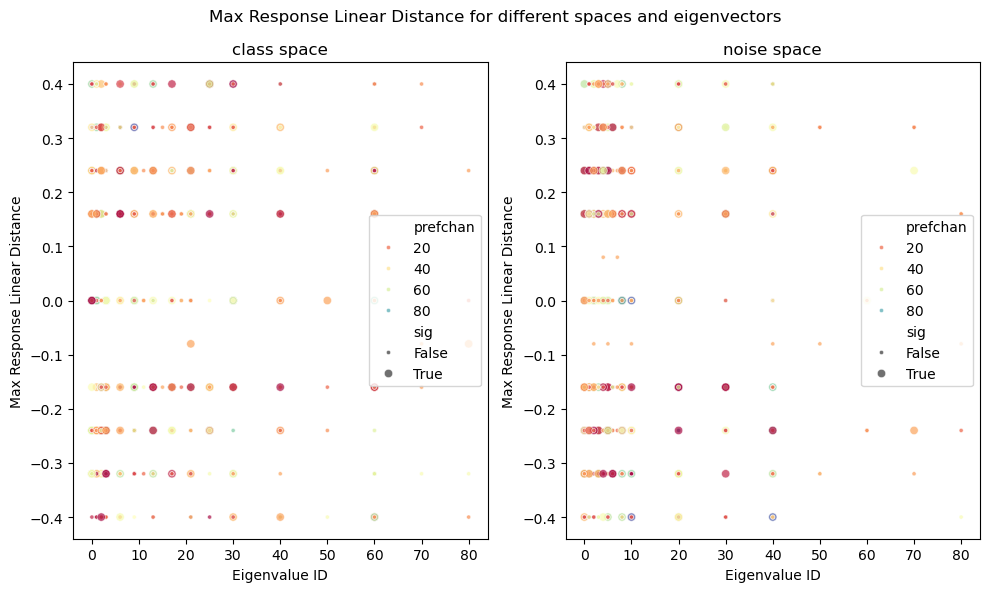

In [10]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='max_resp_lin_dist', ax=ax[0], 
                hue="prefchan", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('Max Response Linear Distance')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
                hue="prefchan", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors')
plt.tight_layout()
plt.show()
# %%